In [20]:
import pandas as pd
df = pd.read_csv("restaurant_data.csv")

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
df.head()

,Restaurant,Critic A,Critic B,Critic C,Critic D,Critic E,Critic F
0,Asia Grand,NaN,4.0,7.0,9.0,NaN,9.0
1,Cathay Restaurant,3.0,NaN,6.0,5.0,6.0,6.0
2,Cherry Garden,3.0,10.0,NaN,10.0,5.0,NaN
3,Crystal Jade,3.0,NaN,5.0,7.0,NaN,NaN
4,Hua Ting,5.0,5.0,7.0,NaN,7.0,5.0


In [22]:
# covariance of critic
df.cov()

,Critic A,Critic B,Critic C,Critic D,Critic E,Critic F
Critic A,3.654545,1.200000,1.261905,-1.236111,1.232143,1.250000
Critic B,1.200000,5.809524,-0.500000,2.750000,-0.800000,-0.600000
Critic C,1.261905,-0.500000,1.071429,-0.309524,0.166667,0.500000
Critic D,-1.236111,2.750000,-0.309524,4.622222,-1.333333,2.357143
Critic E,1.232143,-0.800000,0.166667,-1.333333,0.553571,0.214286
Critic F,1.250000,-0.600000,0.500000,2.357143,0.214286,4.233333


In [23]:
# Mean score of restaurant
df['Average Rating']=df.mean(axis=1)

In [25]:
# number of critic assess the restaurant
df['Weight'] = df[['Critic A','Critic B','Critic C','Critic D','Critic E','Critic F']].count(axis=1, numeric_only=True)

In [26]:
# Weight * average ratings
df['W*R']=df['Average Rating']*df['Weight']

In [27]:
df.head()

,Restaurant,Critic A,Critic B,Critic C,Critic D,Critic E,Critic F,Average Rating,Weight,W*R
0,Asia Grand,NaN,4.0,7.0,9.0,NaN,9.0,7.25,4,29.0
1,Cathay Restaurant,3.0,NaN,6.0,5.0,6.0,6.0,5.20,5,26.0
2,Cherry Garden,3.0,10.0,NaN,10.0,5.0,NaN,7.00,4,28.0
3,Crystal Jade,3.0,NaN,5.0,7.0,NaN,NaN,5.00,3,15.0
4,Hua Ting,5.0,5.0,7.0,NaN,7.0,5.0,5.80,5,29.0


In [28]:

# C is average ratings for all restaurant
C = df['W*R'].sum()/df['Weight'].sum()
# m is average number of ratings for all restaurant
m = df['Weight'].sum()/df['Weight'].count()
# v is number of ratings for that restaurant
v = df['Weight']
# R is average ratings for the restaurant
R = df['Average Rating']

In [29]:
# Bayesian weighted average
def Bayes(R,C,v,m):
    w = v/(v+m)
    return w*R + (1-w)*C 

In [ ]:
df['Bayes_score']=Bayes(R,v,m,C)

In [31]:
# ranking restaurant
df['Ranking'] = df['Bayes_score'].rank(ascending=False)

In [32]:
df.head(11)

,Restaurant,Critic A,Critic B,Critic C,Critic D,Critic E,Critic F,Average Rating,Weight,W*R,Bayes_score,Ranking
0,Asia Grand,NaN,4.0,7.0,9.0,NaN,9.0,7.25,4,29.0,5.428119,3.0
1,Cathay Restaurant,3.0,NaN,6.0,5.0,6.0,6.0,5.20,5,26.0,5.087884,8.0
2,Cherry Garden,3.0,10.0,NaN,10.0,5.0,NaN,7.00,4,28.0,5.318264,6.0
3,Crystal Jade,3.0,NaN,5.0,7.0,NaN,NaN,5.00,3,15.0,3.878843,12.0
4,Hua Ting,5.0,5.0,7.0,NaN,7.0,5.0,5.80,5,29.0,5.351537,4.5
5,Imperial Treasure,8.0,8.0,NaN,NaN,7.0,4.0,6.75,4,27.0,5.208409,7.0
6,Jade Palace,5.0,NaN,8.0,5.0,6.0,5.0,5.80,5,29.0,5.351537,4.5
7,Jiang Nan Chun,3.0,3.0,NaN,5.0,6.0,4.0,4.20,5,21.0,4.648463,10.0
8,New Majestic,7.0,7.0,NaN,4.0,7.0,8.0,6.60,5,33.0,5.703074,1.5
9,Peach Garden,4.0,6.0,6.0,4.0,NaN,2.0,4.40,5,22.0,4.736347,9.0


I choose Bayesian Average because it is widely used in compare the ratings of restaurant.

In [33]:
df.to_csv('out.csv')

In [34]:
df_zscore = df.copy()

In [35]:
# calculate z-score
def zscore(cols):
    return (cols - cols.mean())/cols.std(ddof=1)

In [36]:
df_zscore = df_zscore.drop(columns = 'Restaurant').apply(zscore)

In [37]:
df_zscore.head()

,Critic A,Critic B,Critic C,Critic D,Critic E,Critic F,Average Rating,Weight,W*R,Bayes_score,Ranking
0,NaN,-0.889043,0.241523,1.488417,NaN,1.798293,1.376686,-0.74162,0.556900,0.656111,-0.974137
1,-0.855979,NaN,-0.724569,-0.372104,-0.504016,0.340218,-0.515296,0.74162,0.029311,0.061113,0.417487
2,-0.855979,1.600278,NaN,1.953547,-1.848059,NaN,1.145957,-0.74162,0.381037,0.463998,-0.139162
3,-0.855979,NaN,-1.690661,0.558156,NaN,NaN,-0.699880,-2.22486,-1.905184,-2.053242,1.530787
4,0.190218,-0.474156,0.241523,NaN,0.840027,-0.145808,0.038455,0.74162,0.556900,0.522185,-0.556650


In [41]:
df_cov = df[['Restaurant','Critic A','Critic B','Critic C','Critic D','Critic E','Critic F']]
df_cov = df_cov.cov()
df_cov

,Critic A,Critic B,Critic C,Critic D,Critic E,Critic F
Critic A,3.654545,1.200000,1.261905,-1.236111,1.232143,1.250000
Critic B,1.200000,5.809524,-0.500000,2.750000,-0.800000,-0.600000
Critic C,1.261905,-0.500000,1.071429,-0.309524,0.166667,0.500000
Critic D,-1.236111,2.750000,-0.309524,4.622222,-1.333333,2.357143
Critic E,1.232143,-0.800000,0.166667,-1.333333,0.553571,0.214286
Critic F,1.250000,-0.600000,0.500000,2.357143,0.214286,4.233333


In [44]:
df_cov.corr()

,Critic A,Critic B,Critic C,Critic D,Critic E,Critic F
Critic A,1.000000,-0.201856,0.702145,-0.760598,0.878240,-0.196109
Critic B,-0.201856,1.000000,-0.653979,0.566622,-0.624645,-0.393190
Critic C,0.702145,-0.653979,1.000000,-0.710895,0.821636,0.149496
Critic D,-0.760598,0.566622,-0.710895,1.000000,-0.896213,0.382172
Critic E,0.878240,-0.624645,0.821636,-0.896213,1.000000,-0.007145
Critic F,-0.196109,-0.393190,0.149496,0.382172,-0.007145,1.000000


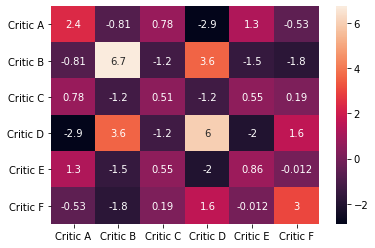

In [47]:
cov_matrix = df_cov.cov()
sns.heatmap(cov_matrix,annot = True)
plt.show()

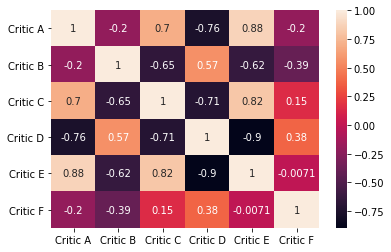

In [48]:
corr_matrix = df_cov.corr()
sns.heatmap(corr_matrix,annot = True)
plt.show()